In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [3]:
labeledImages = pd.read_csv('train.csv')

In [13]:
images = labeledImages.iloc[0:5000,1:]
labels = labeledImages.iloc[0:5000,:1]

In [14]:
# you now seperate the training and the test images 
# use sklearn.model_selection.train_test_split
trainImages, testImages, trainLabels, testLabels = train_test_split(images,labels,train_size=0.8,random_state = 0)

In [18]:
trainImages.shape, testImages.shape,trainLabels.shape,testImages.shape

((4000, 784), (1000, 784), (4000, 1), (1000, 784))

In [19]:
# not we need to convert the 784 long vector into a 28x28 image
# you can do it in two steps
# first: load it into an numpy array.
# second: reshape it in 28x28

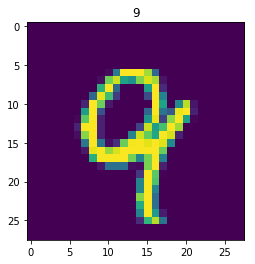

In [27]:
i = 3999
img = trainImages.iloc[i].as_matrix()
img = img.reshape((28,28))
plt.imshow(img)
plt.title(trainLabels.iloc[i,0])

In [24]:
# notice how the aboove image is coloured
# for making it black and white you can play around with plt.imshow
plt.imshow?

(array([ 660.,    7.,    4.,   13.,   11.,    9.,    6.,   11.,   11.,   52.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

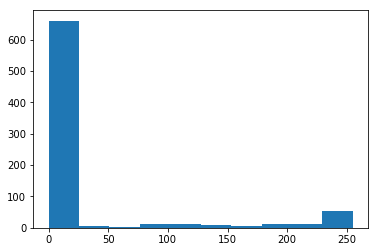

In [28]:
plt.hist(trainImages.iloc[i])

In [29]:
# if you want you can check out histograms because it shows the spatial arrangement, or the range of pixel values

In [30]:
# now comes training the model using sklearn.svm
# steps involved in training the classifier
# 1. create an SVM vector classifier
# 2. train your model using fit method
# 3. use the score method to get accuracy

In [46]:
clf = svm.SVC(kernel = 'linear')
clf.fit(trainImages, trainLabels.values.ravel())
clf.score(testImages, testLabels)

0.91000000000000003

In [32]:
#  now change parameters of SVC to see changes in the accuracy
svm.SVC?
# notice how changing the kernel from the default(rbf) to linear changes the accuracy: 10% to 91% 
# look into theory of SVM for more intuition

In [38]:
clf.fit? # this requires your labels to be flattened therefore you use revel()
# check if you can use it on an array 28x28 and then resize it and see if you can get the same image back

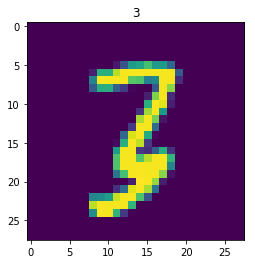

In [45]:
temporary = trainImages.iloc[2].values.reshape((28,28))
plt.imshow(temporary)
plt.title(trainLabels.iloc[2,0])

# this block is typed by you. You are understanding how stuff works keep going. 

C:\Users\My Legion\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\My Legion\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:2464: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\My Legion\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

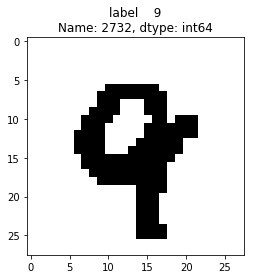

In [50]:
testImages[testImages>0] = 1
trainImages[trainImages>0] = 1

img = trainImages.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img, cmap = 'binary')
plt.title(trainLabels.iloc[i])

(array([ 638.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  146.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

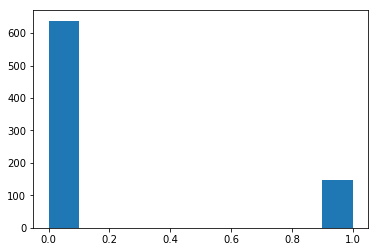

In [51]:
# as this is converted into true black and white now ckeck the histogram of that image and confirm that the pixel values
# are either extremes

plt.hist(trainImages.iloc[i])

In [61]:
# retraining our model on black and white instead of grey scale

clf = svm.SVC(kernel = 'rbf')
clf.fit(trainImages, trainLabels.values.ravel())
clf.score(testImages,testLabels)

0.88700000000000001

In [57]:
test_data = pd.read_csv('test.csv')
test_data[test_data>0] = 1
results = clf.predict(test_data[0:5000])

In [58]:
results

array([2, 0, 9, ..., 1, 7, 3], dtype=int64)

In [59]:
df = pd.DataFrame(results)
df.index.name = 'ImageId'
df.index+=1
df.columns = ['Label']
df.to_csv('results.csv',header = True)